In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import os

In [2]:
ft = np.load(r'D:\Ali_Thesis\synthetic_data_generation\Data\Process_canada_data\features_extraction\trial_12\features.npz')['arr_0']
ft.shape, ft[0]

((417840, 10),
 array([-0.06090377,  0.09185255, -1.0835497 ,  0.13817254, -0.7348305 ,
         0.29094416,  0.2682994 ,  0.3133758 ,  0.2505676 ,  0.08495618],
       dtype=float32))

In [3]:
ft.min(), ft.max(), ft.std(), ft.var()

(np.float32(-2.5654716),
 np.float32(2.0995321),
 np.float32(0.53848153),
 np.float32(0.28996235))

In [4]:
# 5. Load Data
def load_data(file_path, dataset):
    with h5py.File(file_path, 'r') as f:
        X = f[dataset][:]
    return X

In [5]:
def process_data(X):
    # X_trans = X.transpose(0,2,1)

    # X_reshaped = X_trans.reshape(-1, 120, 150, 6)

    # X_10_min = X_reshaped.transpose(0,3,1,2)

    # X_10_min = X_10_min.reshape(3482, 6, -1)
    # print(X_10_min.shape)
    # Processing input
    f_rs = X.reshape(-1, 12, X.shape[1])
    print(f_rs.shape)
    return f_rs

In [6]:
# def order_data(X, order):
#     # Reshape for fitting: (samples * features, timesteps) → (20*6, 150)
#     # X_reshaped = X.reshape(-1, X.shape[2])  

#     # Fit scaler on entire dataset
#     # scaler = StandardScaler()
#     # X_standardized = scaler.fit_transform(X_reshaped)

#     # Reshape back to (20, 6, 150)
#     # X_standardized = X_standardized.reshape(X.shape[0], X.shape[1], X.shape[2])

#     # Reorder using NumPy indexing
#     X_reorderd = X[:, order, :]

#     # Print shape to confirm it remains unchanged
#     print("Original shape:", X.shape)
#     print("Standardized and reordered shape:", X_reorderd.shape)
#     return X_reorderd

In [7]:
# X_real = load_data(r'D:\Ali_Thesis\synthetic_data_generation\Data\Process_canada_data\P13_5_sec_30hz_sequences_sensor_data_std_normalized.h5', 'data')
current_dir = os.getcwd()
features_path = os.path.join(current_dir, 'reconstructed_features.h5')
ft_syn = load_data(features_path, 'reconstructed_features')
ft_syn.shape

(34816, 12, 10)

In [8]:
ft_full = process_data(ft)
ft = ft_full[:34816]
ft.shape
# X_real = process_data(X_real)
# order = [1, 2, 3, 4, 5, 0]  # Acc_X, Acc_y, Acc_z, BvP, EDA, TEMP
# data = order_data(X_real, order)

(34820, 12, 10)


(34816, 12, 10)

In [9]:
# ft = ft.reshape(-1, 1536, 10)
# ft_syn = ft_syn.reshape(-1, 1536, 10)
ft = ft.reshape(-1, 96, 10)
ft_syn = ft_syn.reshape(-1, 96, 10)
ft.shape, ft_syn.shape

((4352, 96, 10), (4352, 96, 10))

In [10]:
# def plot(X, title):
#     for i in range(6):
#         plt.figure(figsize=(16, 6))
#         plt.plot(X[0, i, :], label=i)
#         # Adding labels and title
#         plt.xlabel('Timestep')
#         plt.ylabel('Data')
#         plt.title(f"{title} of sensor: {i}")

#         # Show legend
#         plt.legend()

#         # Display the plot
#         plt.show()

In [12]:
# Load Data
def load_conditions(file_path):
    cond = np.load(file_path)['arr_0']

    # Processing input
    # c_rs = cond.reshape(-1, 12, cond.shape[1])

    # c = torch.from_numpy(cond).float()
    print(f'Conditions Shape: {cond.shape}')
    return cond

In [13]:
condition_path = r'D:\Ali_Thesis\synthetic_data_generation\Data\Process_canada_data\Activities_probs\trial_3_scipy_resample\P13_conditions_onehot.npz'
conditions = load_conditions(condition_path)

Conditions Shape: (417840, 7)


In [14]:
cond = conditions[:, :6]
cond[0]

array([0., 0., 0., 0., 1., 0.], dtype=float32)

In [15]:
cond = cond[:96]
cond.shape

(96, 6)

In [16]:
condition_indices = np.argmax(cond, axis=1)  # shape: (144000,

condition_indices.shape

(96,)

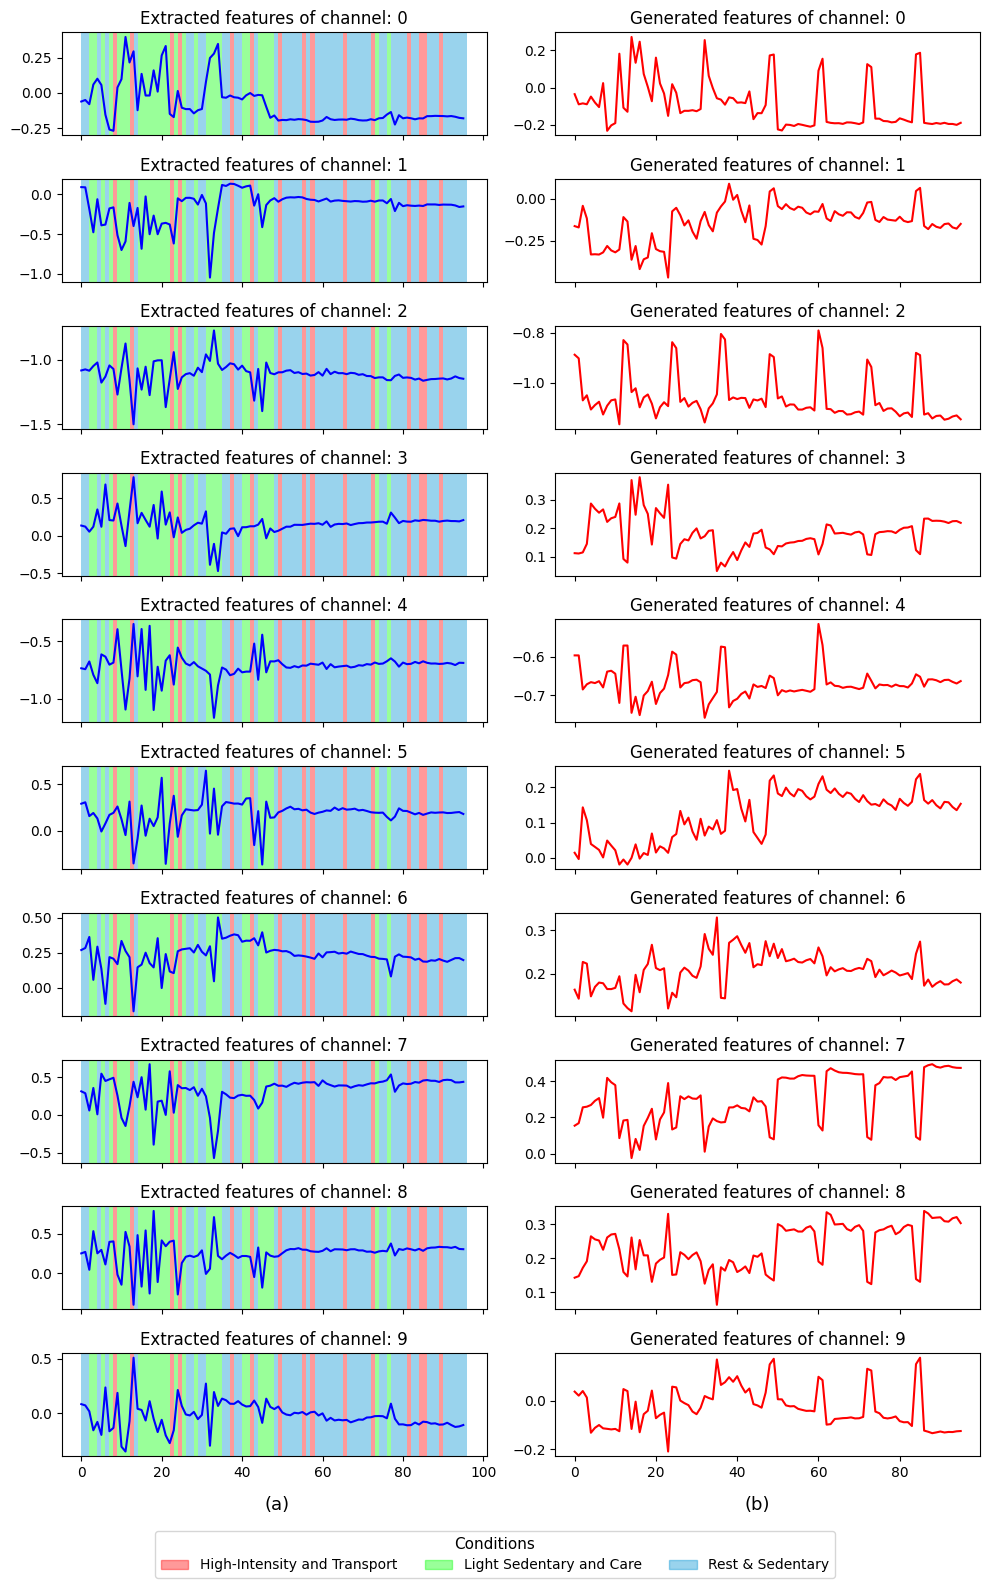

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from itertools import groupby

condition_colors = [
    '#FF0000',  # blue
    "#18DAA6",  # turquoise-green
    '#000088',  # orange
    '#00FF00',  # green
    '#0093D3',  # red
    "#FFA000"   # teal
]

condition_labels  = [
    'High-Intensity and Transport', 
    'Hiking & Walking', 
    'Household & Light Manual',
    'Light Sedentary and Care', 
    'Rest & Sedentary', 
    'Walking Activities Across Contexts'
    ]

# Create a figure with 10 rows and 2 columns
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(10, 15))

# Flatten axes array for easy iteration
axes = axes.flatten()

# ───────────────────────────────────────────
# 2.  DRAW BACKGROUND ONLY ON LEFT COLUMN
# ───────────────────────────────────────────
# Left‑column axes are 0, 3, 6, … → index % 3 == 0
left_column_axes = [ax for idx, ax in enumerate(axes) if idx % 2 == 0]

for ax in left_column_axes:
    for k, g in groupby(enumerate(condition_indices), key=lambda x: x[1]):
        g = list(g)
        start = g[0][0]
        end   = g[-1][0] + 1
        ax.axvspan(start, end,
                   color=condition_colors[k],
                   alpha=0.4, linewidth=0)
        
# Plot in each subplot
for i in range(10):
    axes[i * 2].plot(ft[0, :, i], color='b', label=f'feature: {i}')  # Left column
    axes[i * 2].set_title(f'Extracted features of channel: {i}')
    
    axes[i * 2 + 1].plot(ft_syn[0, :, i], color='r', label=f'feature: {i}')  # Right column
    axes[i * 2 + 1].set_title(f'Generated features of channel: {i}')

# Hide x-axis labels for all subplots except the last row
for ax in axes[:-2]:  # last row: axes[-2] and axes[-1]
    ax.set_xticklabels([])
    ax.set_xlabel('')  # optional: remove xlabel if any

# ───────────────────────────────────────────
# 5.  LEGEND ON FIRST SUBPLOT ONLY
# ───────────────────────────────────────────
selected = [0,3,4]
legend_patches = [mpatches.Patch(color=condition_colors[i],
                                 label=condition_labels[i],
                                 alpha=0.4)
                  for i in selected]

# Add legend to the entire figure below all subplots
fig.legend(
    handles=legend_patches,
    loc='lower center',
    ncol=3,              # Spread across columns
    bbox_to_anchor=(0.5, -0.06),  # Centered below the figure
    fontsize=10,
    title='Conditions',
    title_fontsize=11,
    frameon=True
)

plt.tight_layout()

fig.text(0.27, -0.01, '(a)', fontsize=13)  # Left column
fig.text(0.75, -0.01, '(b)', fontsize=13)  # Middle column
# fig.text(0.81, -0.01, '(c)', fontsize=13)  # Right column

plt.show()

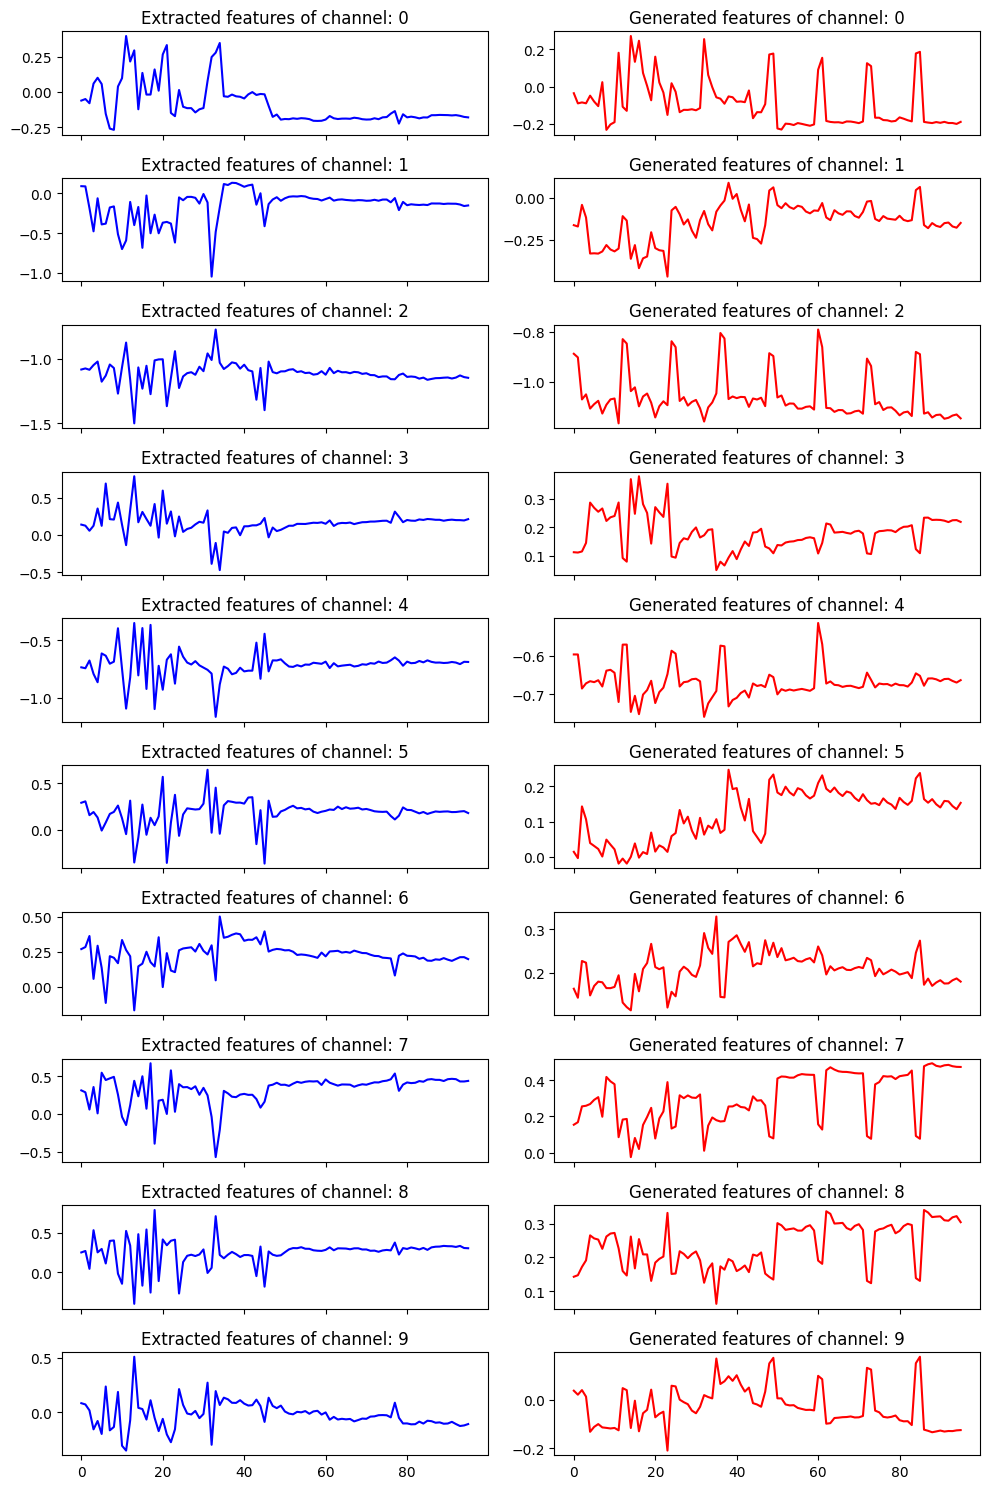

In [ ]:
# Create a figure with 10 rows and 2 columns
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(10, 15))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot in each subplot
for i in range(10):
    axes[i * 2].plot(ft[0, :, i], color='b', label=f'feature: {i}')  # Left column
    axes[i * 2].set_title(f'Extracted features of channel: {i}')
    
    axes[i * 2 + 1].plot(ft_syn[0, :, i], color='r', label=f'feature: {i}')  # Right column
    axes[i * 2 + 1].set_title(f'Generated features of channel: {i}')


# Hide x-axis labels for all subplots except the last row
for ax in axes[:-2]:  # last row: axes[-2] and axes[-1]
    ax.set_xticklabels([])
    ax.set_xlabel('')  # optional: remove xlabel if any
    
# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()